In [221]:
#importing the packages
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns

In [222]:
#importing the data
airlines = pd.read_csv(r"F:\AMPBA MATERIALS\UN ML\EastWestAirlinesCluster-updated.csv")
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [223]:
#eda
airlines.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [224]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [225]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


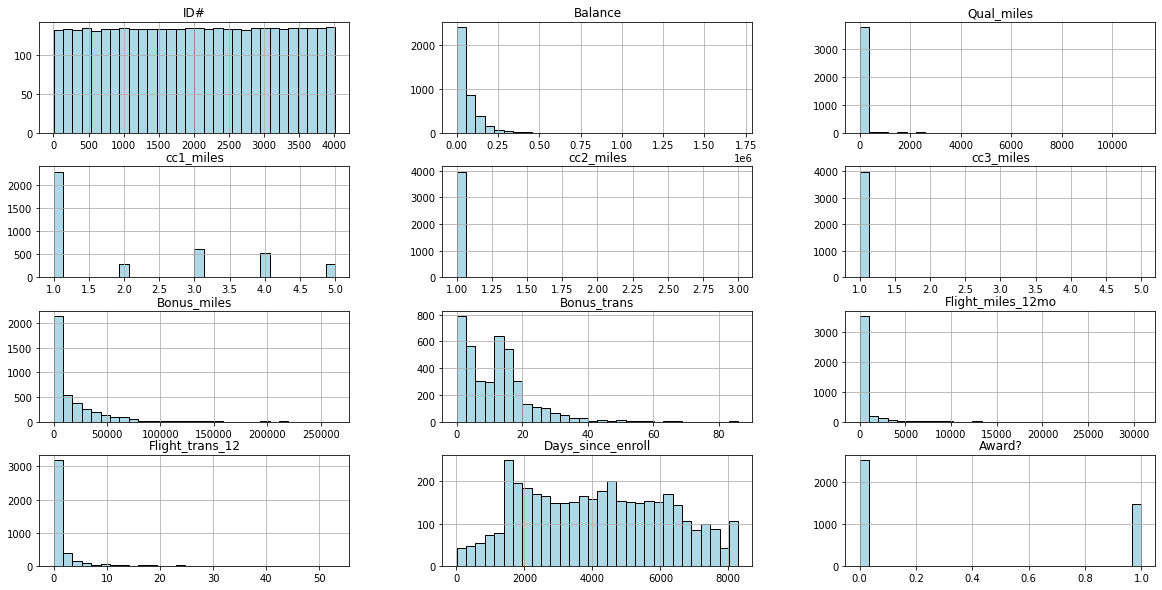

In [226]:
airlines.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

In [227]:
#Normalization
from sklearn.preprocessing import normalize
normalized = normalize(airlines)
print("Normalized Data = ", normalized)

Normalized Data =  [[3.44815547e-05 9.70414393e-01 0.00000000e+00 ... 0.00000000e+00
  2.41370883e-01 0.00000000e+00]
 [9.77144636e-05 9.40208568e-01 0.00000000e+00 ... 0.00000000e+00
  3.40437191e-01 0.00000000e+00]
 [7.11742344e-05 9.81113097e-01 0.00000000e+00 ... 0.00000000e+00
  1.66879855e-01 0.00000000e+00]
 ...
 [5.15333231e-02 9.43691958e-01 0.00000000e+00 ... 0.00000000e+00
  1.79770388e-02 1.28224243e-05]
 [7.30001869e-02 9.96924692e-01 0.00000000e+00 ... 1.81592505e-05
  2.54411099e-02 0.00000000e+00]
 [7.70720943e-01 5.78088626e-01 0.00000000e+00 ... 0.00000000e+00
  2.67960179e-01 0.00000000e+00]]


In [228]:
normalized_data = pd.DataFrame(normalized,columns= airlines.columns)
normalized_data.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [229]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
z = linkage(normalized_data, method="complete",metric="euclidean")


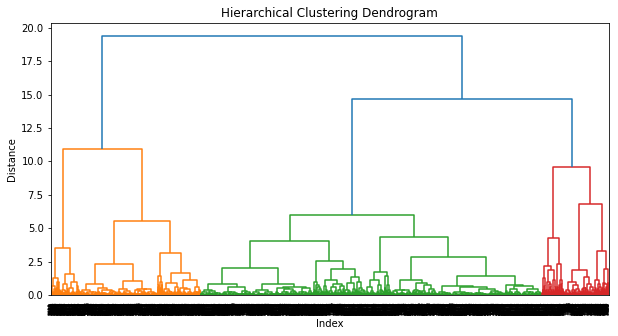

In [230]:
# for creating dendrogram with ward method 
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(normalized_data, method='ward'))

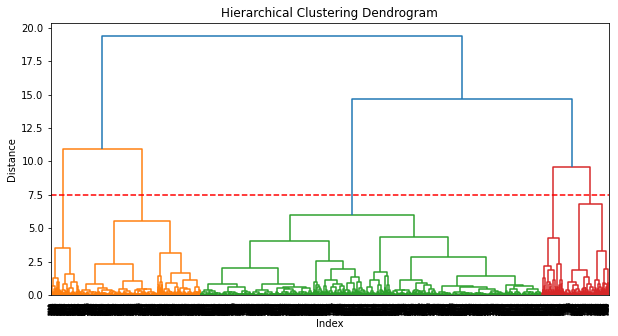

In [231]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(normalized_data, method='ward'))
plt.axhline(y=7.5, color='r', linestyle='--')

In [232]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=5,linkage='complete',affinity = "euclidean").fit(normalized_data)
h_complete.fit_predict(normalized_data)

array([1, 1, 1, ..., 1, 1, 3], dtype=int64)

In [233]:
airlines_labels=pd.Series(h_complete.labels_)
airlines['clust']=airlines_labels # creating a  new column and assigning it to new column 
print(airlines)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [234]:
cluster_labels=pd.Series(h_complete.labels_)
normalized_data['clust']=cluster_labels # creating a  new column and assigning it to new column 
print(normalized_data)

           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     0.000034  0.970414         0.0   0.000034   0.000034   0.000034   
1     0.000098  0.940209         0.0   0.000049   0.000049   0.000049   
2     0.000071  0.981113         0.0   0.000024   0.000024   0.000024   
3     0.000245  0.904428         0.0   0.000061   0.000061   0.000061   
4     0.000047  0.912226         0.0   0.000037   0.000009   0.000009   
...        ...       ...         ...        ...        ...        ...   
3994  0.193227  0.888739         0.0   0.000048   0.000048   0.000048   
3995  0.062263  0.997710         0.0   0.000015   0.000015   0.000015   
3996  0.051533  0.943692         0.0   0.000038   0.000013   0.000013   
3997  0.073000  0.996925         0.0   0.000018   0.000018   0.000018   
3998  0.770721  0.578089         0.0   0.000192   0.000192   0.000192   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0        0.006000     0.000034           0.000000    

In [235]:
airlines.to_csv("airlines-labeled.csv",encoding="utf-8")

In [236]:
print('Count in each cluster: \n', airlines['clust'].value_counts())

Count in each cluster: 
 1    3479
0     324
3      95
2      73
4      28
Name: clust, dtype: int64


In [237]:

airlines_0 = airlines[(airlines ['clust'] == 0)]
airlines_1 = airlines[(airlines ['clust'] == 1)]
airlines_2 = airlines[(airlines ['clust'] == 2)]
airlines_3 = airlines[(airlines ['clust'] == 3)]
airlines_4 = airlines[(airlines ['clust'] == 4)]




In [238]:
airlines_0_norm = normalized_data[(normalized_data ['clust'] == 0)]
airlines_1_norm = normalized_data[(normalized_data ['clust'] == 1)]
airlines_2_norm = normalized_data[(normalized_data ['clust'] == 2)]
airlines_3_norm = normalized_data[(normalized_data ['clust'] == 3)]
airlines_4_norm = normalized_data[(normalized_data ['clust'] == 4)]






In [239]:
#Ans (c)
airlines_cent = airlines.drop(columns = ['ID#']).groupby('clust').agg("mean")
airlines_cent.transpose()

clust,0,1,2,3,4
Balance,26318.839506,82008.563668,2912.972603,2746.357895,823.607143
Qual_miles,122.901235,153.929865,0.000000,10.231579,0.000000
cc1_miles,3.166667,2.015522,1.027397,1.000000,1.000000
cc2_miles,1.037037,1.013222,1.000000,1.000000,1.000000
cc3_miles,1.077160,1.006899,1.000000,1.000000,1.000000
Bonus_miles,41853.302469,15773.764300,872.246575,478.505263,561.142857
Bonus_trans,17.611111,11.572003,2.986301,1.663158,1.964286
Flight_miles_12mo,781.123457,454.737856,49.315068,5.789474,17.714286
Flight_trans_12,2.225309,1.366485,0.191781,0.021053,0.071429
Days_since_enroll,4225.108025,4174.479448,5757.671233,882.463158,2643.785714


In [240]:
#Ans (d)
airlines_95 = airlines.copy()

In [241]:
#a random sample of 95% of the records
data_95 = airlines_95.sample(frac= 0.95)
data_95.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
636,645,70133,0,2,1,1,7396,16,0,0,6392,0,1
2619,2638,16128,0,1,1,1,475,3,0,0,2643,0,1
132,135,145074,0,1,1,1,8000,4,0,0,6746,1,1
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,1
3074,3096,43255,0,1,1,1,2691,3,750,1,2864,0,1


In [242]:
data_95.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
count,3799.000000,3.799000e+03,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,2015.515662,7.305122e+04,139.425112,2.053172,1.013688,1.012898,17087.480916,11.581206,457.329297,1.360884,4116.861279,0.366939,1.007107
std,1161.716486,9.963887e+04,763.227206,1.375638,0.142652,0.200295,24220.794598,9.635056,1397.711203,3.776895,2065.101585,0.482033,0.504014
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,1010.500000,1.852150e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2327.000000,0.000000,1.000000
50%,2020.000000,4.257200e+04,0.000000,1.000000,1.000000,1.000000,7048.000000,12.000000,0.000000,0.000000,4090.000000,0.000000,1.000000
75%,3022.500000,9.169300e+04,0.000000,3.000000,1.000000,1.000000,23776.500000,16.000000,300.000000,1.000000,5789.500000,1.000000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000,4.000000


In [243]:
from sklearn.preprocessing import normalize
normalized_95 = normalize(data_95)
print("Normalized Data = ", normalized_95)

Normalized Data =  [[9.10837761e-03 9.90384259e-01 0.00000000e+00 ... 9.02647282e-02
  0.00000000e+00 1.41215157e-05]
 [1.59285312e-01 9.73826197e-01 0.00000000e+00 ... 1.59587217e-01
  0.00000000e+00 6.03810886e-05]
 [9.28147649e-04 9.97408089e-01 0.00000000e+00 ... 4.63798818e-02
  6.87516777e-06 6.87516777e-06]
 ...
 [5.04722454e-02 2.74849868e-01 0.00000000e+00 ... 8.14271991e-01
  1.01758559e-04 2.03517118e-04]
 [1.32422506e-02 9.99367766e-01 0.00000000e+00 ... 3.27871607e-02
  7.40618041e-06 7.40618041e-06]
 [1.63755645e-01 9.00865318e-01 0.00000000e+00 ... 1.37439642e-01
  5.23180974e-05 0.00000000e+00]]


In [244]:
normalized_data_95 = pd.DataFrame(normalized_95, columns= airlines.columns)
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
z = linkage(normalized_data, method="complete",metric="euclidean")

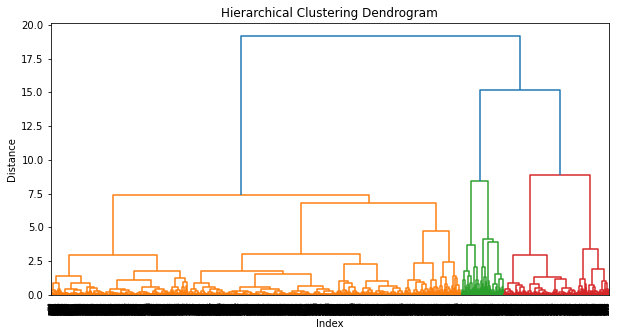

In [245]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(normalized_95, method='ward'))

In [246]:
airlines_0_norm = normalized_data[(normalized_data ['clust'] == 0)]
print(airlines_0_norm)

           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
15    0.000278  0.495715         0.0   0.000070   0.000017   0.000017   
41    0.001043  0.259949         0.0   0.000099   0.000025   0.000025   
79    0.000947  0.449110         0.0   0.000058   0.000012   0.000012   
80    0.002451  0.128150         0.0   0.000030   0.000030   0.000030   
85    0.001279  0.514951         0.0   0.000073   0.000015   0.000015   
...        ...       ...         ...        ...        ...        ...   
3908  0.050485  0.740289         0.0   0.000051   0.000013   0.000013   
3913  0.193810  0.638451         0.0   0.000148   0.000049   0.000049   
3919  0.478383  0.606778         0.0   0.000121   0.000121   0.000121   
3930  0.065903  0.673934         0.0   0.000067   0.000017   0.000017   
3978  0.134356  0.338190         0.0   0.000067   0.000034   0.000034   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
15       0.860121     0.000261           0.000000    

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

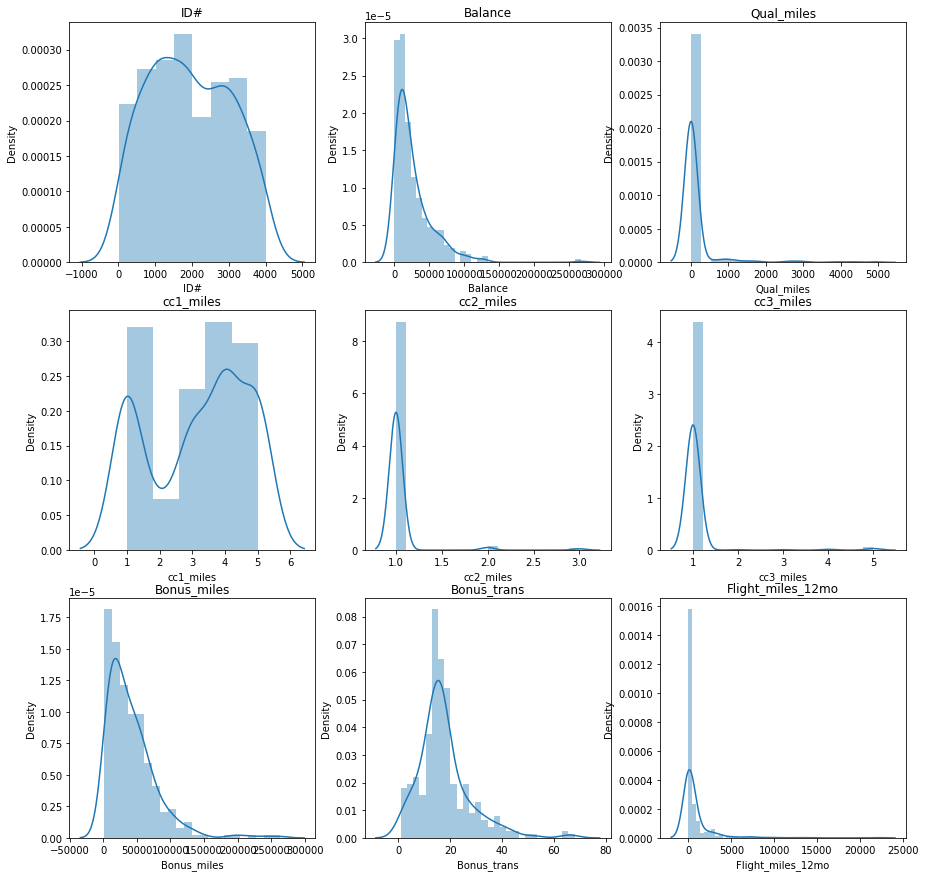

In [247]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, airlines_0.columns):
  sns.distplot(airlines_0[col], ax = ax)
  ax.set_title(col)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

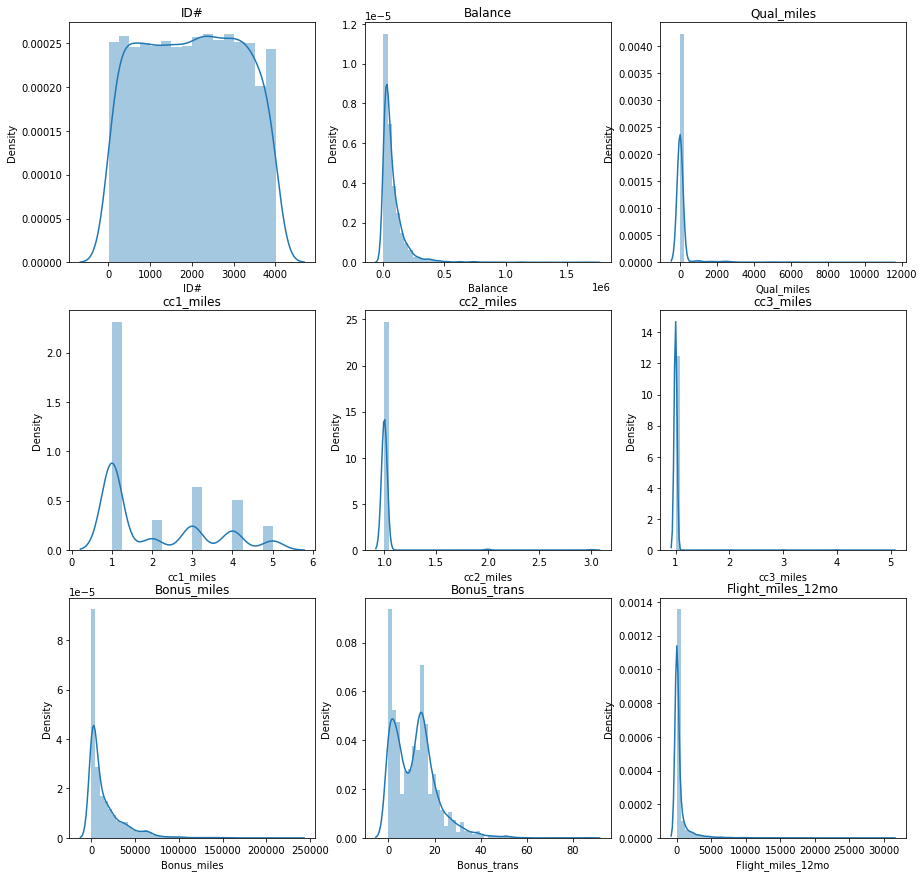

In [248]:
fig, axes = plt.subplots(nrows = 3, ncols = 3)    #3*3 array for plot
axes = axes.flatten()         
fig.set_size_inches(15, 15)

for ax, col in zip(axes, airlines_1.columns):
  sns.distplot(airlines_1[col], ax = ax)
  ax.set_title(col)

Text(0.5, 1.0, 'Correlation')

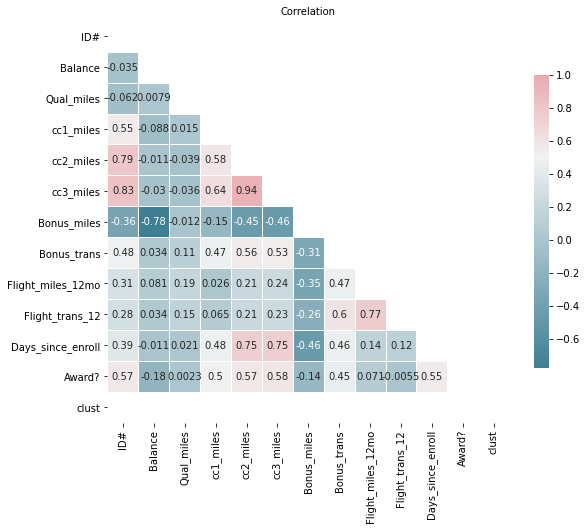

In [249]:
corr = airlines_0_norm.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5, square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)
plt.title("Correlation", fontsize =10)

Text(0.5, 1.0, 'Correlation')

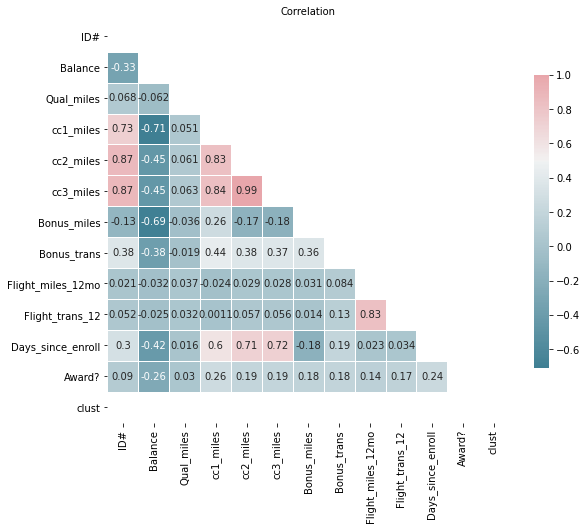

In [250]:
corr = airlines_1_norm.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5, square=True, linewidths=.5, cbar_kws={"shrink": .6},annot=True)
plt.title("Correlation", fontsize =10)

In [251]:
#Ans e
#K-Means clustering 

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [252]:
print("Normalized Data = ", normalized_data)

Normalized Data =             ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0     0.000034  0.970414         0.0   0.000034   0.000034   0.000034   
1     0.000098  0.940209         0.0   0.000049   0.000049   0.000049   
2     0.000071  0.981113         0.0   0.000024   0.000024   0.000024   
3     0.000245  0.904428         0.0   0.000061   0.000061   0.000061   
4     0.000047  0.912226         0.0   0.000037   0.000009   0.000009   
...        ...       ...         ...        ...        ...        ...   
3994  0.193227  0.888739         0.0   0.000048   0.000048   0.000048   
3995  0.062263  0.997710         0.0   0.000015   0.000015   0.000015   
3996  0.051533  0.943692         0.0   0.000038   0.000013   0.000013   
3997  0.073000  0.996925         0.0   0.000018   0.000018   0.000018   
3998  0.770721  0.578089         0.0   0.000192   0.000192   0.000192   

      Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0        0.006000     0.000034    

In [253]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized)
    distortions.append(kmeanModel.inertia_)

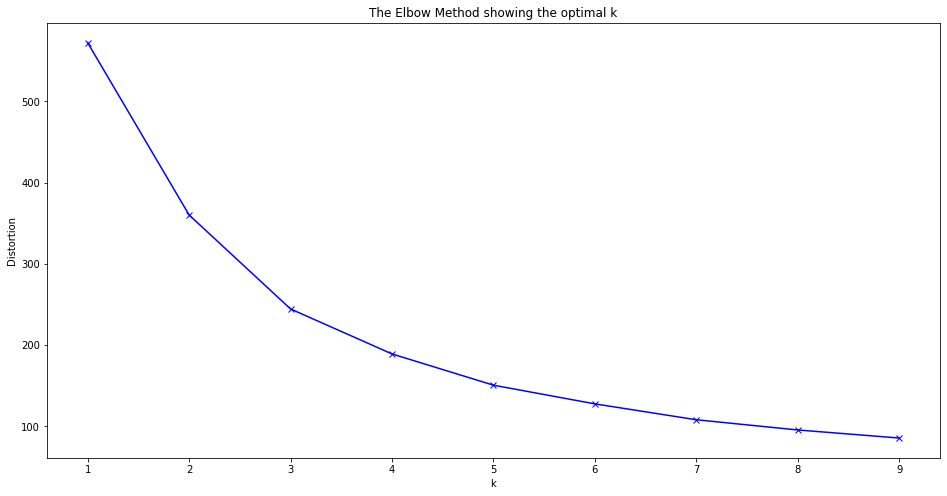

In [254]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [255]:
kmeansModel = KMeans(n_clusters=6)
kmeansModel.fit(normalized_data)
kmeansPredict= kmeansModel.predict(normalized_data)

In [256]:
kmeansModel.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(kmeansModel.labels_)  # converting numpy array into pandas series object 
airlines['clust']=md # creating a  new column and assigning it to new column 
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,5
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,5
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [257]:
normalized_data['clust']=md 
normalized_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,0.000034,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000,3
1,0.000098,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000,5
2,0.000071,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000,3
3,0.000245,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000,5
4,0.000047,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009,1


In [258]:
airlines.to_csv("airlines-labeled-kmeans.csv",encoding="utf-8")

In [259]:
print('Count in each cluster: \n', airlines['clust'].value_counts())

Count in each cluster: 
 3    2116
1     917
5     446
0     324
4     123
2      73
Name: clust, dtype: int64
